In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
dataset_path = "/content/Crop_recommendation.csv"  # Update this path if needed
crop_data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("Dataset Shape:", crop_data.shape)
print("\nFirst 5 Rows of the Dataset:")
print(crop_data.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(crop_data.isnull().sum())

# Display dataset statistics
print("\nDataset Statistics:")
print(crop_data.describe())

# Display unique crop labels
print("\nUnique Crops in the Dataset:")
print(crop_data['label'].unique())

Dataset Shape: (2200, 8)

First 5 Rows of the Dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Missing Values in Each Column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Dataset Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.

In [2]:
# Encode the target variable ('label') into numerical values
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'label' column
y_crop = label_encoder.fit_transform(crop_data['label'])

# Save the label encoder for future use (e.g., decoding predictions)
import pickle
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

# Extract features (X) and target (y)
X_crop = crop_data.drop(columns=['label'])

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(
    X_crop, y_crop, test_size=0.2, stratify=y_crop, random_state=42
)

# Feature Scaling (optional for tree-based models, but required for others)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_crop = scaler.fit_transform(X_train_crop)
X_test_crop = scaler.transform(X_test_crop)

# Save the scaler for future use
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Data preprocessing completed successfully!")

Data preprocessing completed successfully!


Crop Recommendation Accuracy: 0.9954545454545455

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
        

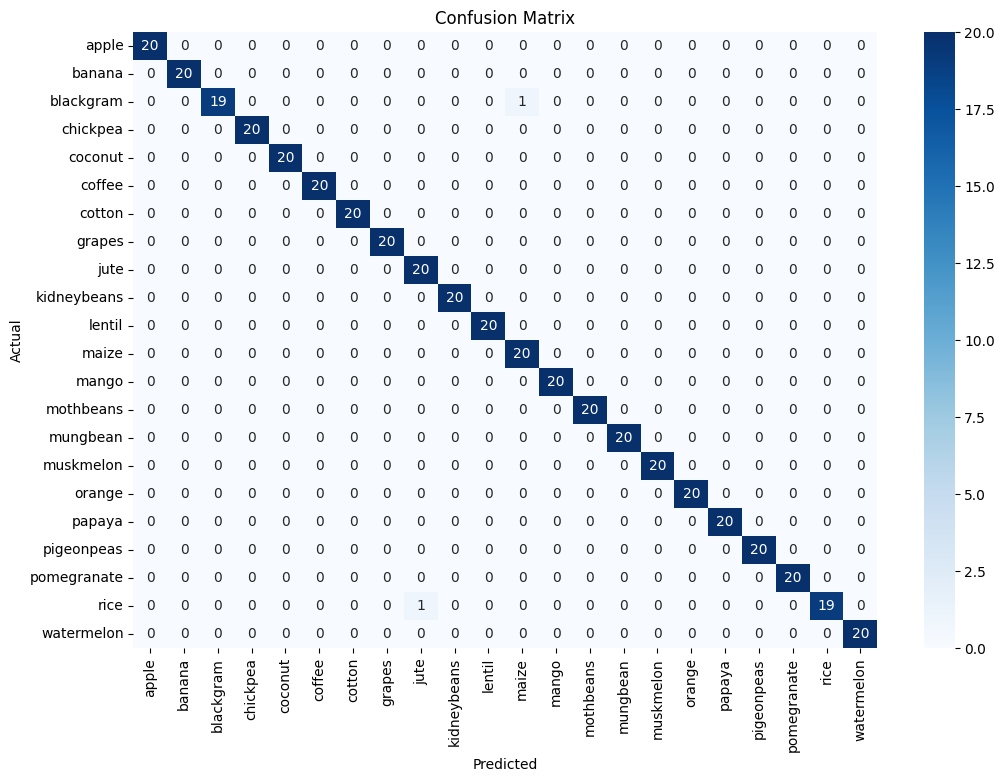

In [3]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_crop, y_train_crop)

# Make predictions on the test set
y_pred_crop = rf_model.predict(X_test_crop)

# Evaluate the model
accuracy = accuracy_score(y_test_crop, y_pred_crop)
print("Crop Recommendation Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test_crop, y_pred_crop))

# Plot the confusion matrix
cm = confusion_matrix(y_test_crop, y_pred_crop)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

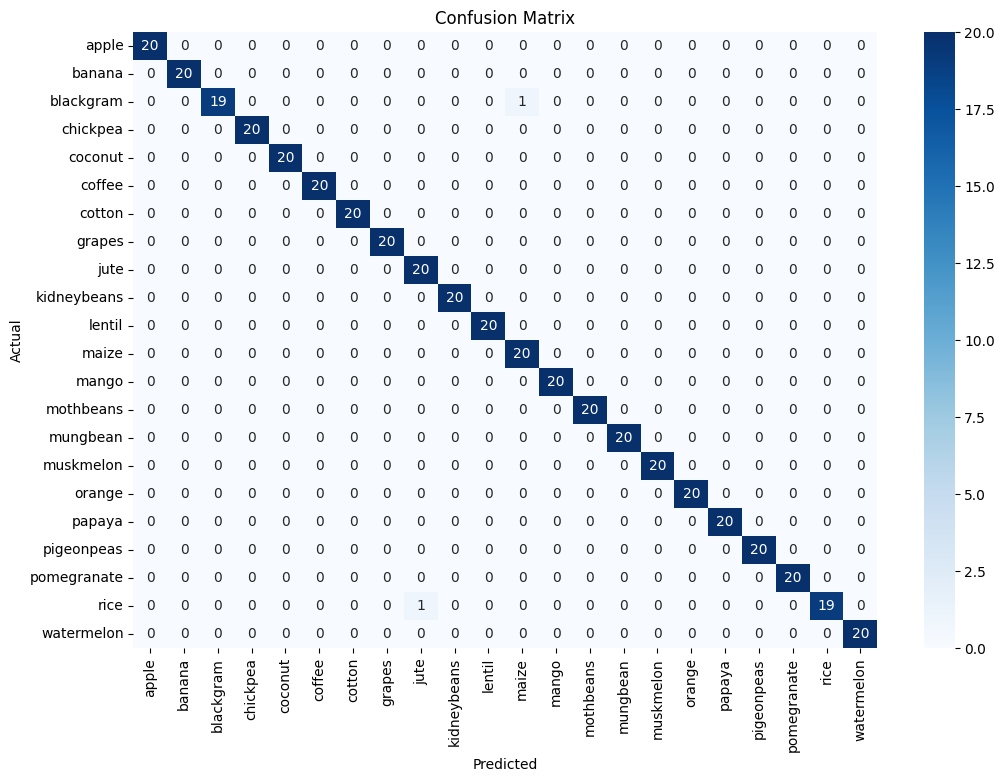

In [4]:
# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Decode the predicted and actual labels for better readability
y_test_crop_decoded = label_encoder.inverse_transform(y_test_crop)
y_pred_crop_decoded = label_encoder.inverse_transform(y_pred_crop)

# Compute the confusion matrix
cm = confusion_matrix(y_test_crop_decoded, y_pred_crop_decoded)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9960227272727271
Tuned Random Forest Accuracy: 0.9954545454545455

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95

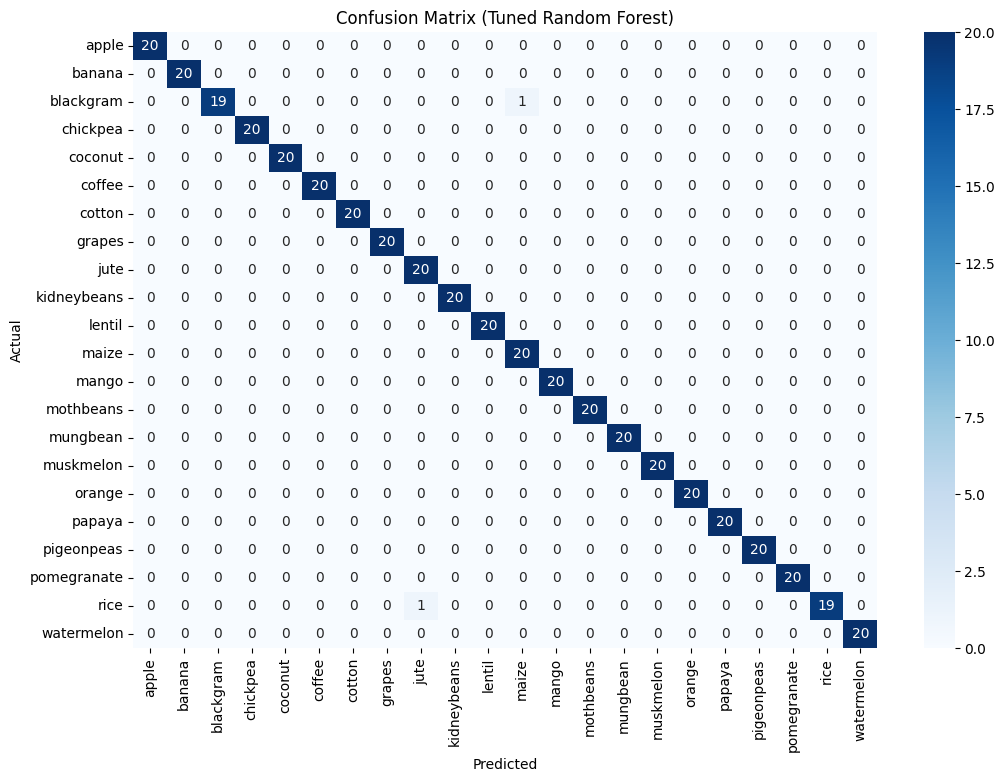

In [7]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Display progress
)
grid_search_rf.fit(X_train_crop, y_train_crop)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_crop)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test_crop, y_pred_best_rf))
print("\nClassification Report:")
print(classification_report(y_test_crop, y_pred_best_rf))

# Plot the confusion matrix for the tuned Random Forest model
cm_best_rf = confusion_matrix(y_test_crop, y_pred_best_rf)
plt.figure(figsize=(12, 8))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()

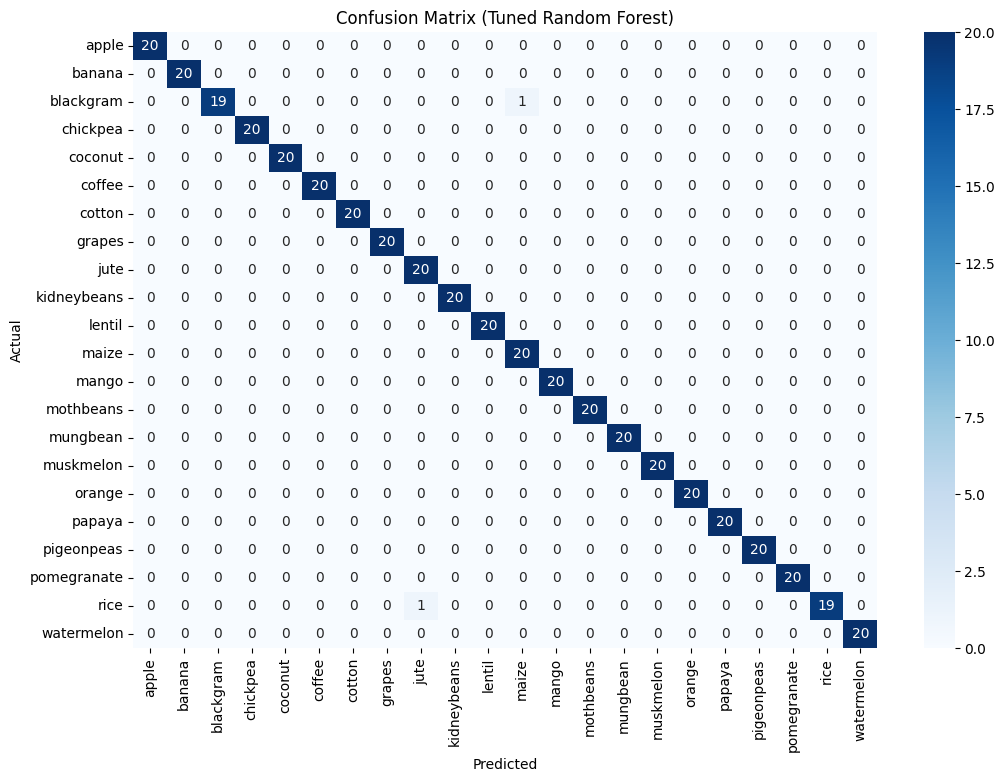

In [8]:
# Plot the confusion matrix for the tuned Random Forest model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_best_rf = confusion_matrix(y_test_crop, y_pred_best_rf)
plt.figure(figsize=(12, 8))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()

In [9]:
# Save the best Random Forest model
import joblib
joblib.dump(best_rf_model, "tuned_random_forest_crop_model.pkl")
print("Tuned Random Forest model saved successfully!")

Tuned Random Forest model saved successfully!


In [11]:
# Example: Predicting on new data
import pandas as pd

# New data (replace with actual values)
new_data = [[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]]

# Convert the new data into a DataFrame with the same column names as the training data
new_data_df = pd.DataFrame(new_data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# Scale the data using the saved scaler
new_data_scaled = scaler.transform(new_data_df)

# Predict the crop
predicted_label = best_rf_model.predict(new_data_scaled)
predicted_crop = label_encoder.inverse_transform(predicted_label)

print("Predicted Crop:", predicted_crop[0])

Predicted Crop: rice


In [12]:
def predict_crop(input_data):
    """
    Predicts the crop type based on input data using the trained model and scaler.

    Parameters:
        input_data (list): A list of features [N, P, K, temperature, humidity, ph, rainfall].

    Returns:
        str: The predicted crop name.
    """
    # Convert input data into a DataFrame with proper column names
    columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    input_df = pd.DataFrame([input_data], columns=columns)

    # Scale the input data
    scaled_data = scaler.transform(input_df)

    # Predict the crop
    predicted_label = best_rf_model.predict(scaled_data)

    # Decode the numerical prediction into the crop name
    predicted_crop = label_encoder.inverse_transform(predicted_label)

    return predicted_crop[0]

In [13]:
# Example input data: [N, P, K, temperature, humidity, ph, rainfall]
new_data = [90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]

# Predict the crop
predicted_crop = predict_crop(new_data)
print("Predicted Crop:", predicted_crop)

Predicted Crop: rice
